<a href="https://colab.research.google.com/github/Sairanga-Putta/Data_Analysis/blob/main/Support_Vector_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler


In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/sahilrahmann/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/car_data.csv")

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df.ndim


2

In [ ]:
df.shape

(4340, 8)

In [ ]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [ ]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df.fuel.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [ ]:
df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [ ]:
df.owner.unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [ ]:
new_fuel=df.fuel.replace({'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4})

In [ ]:
df.insert()

0       0
1       0
2       1
3       0
4       1
       ..
4335    1
4336    1
4337    0
4338    1
4339    0
Name: fuel, Length: 4340, dtype: int64

In [ ]:
df.insert(4,'new_fuel',new_fuel)

In [ ]:
df.head()

,name,year,selling_price,km_driven,new_fuel,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,Individual,Manual,Second Owner


In [ ]:
new_seller=df.seller_type.replace({'Individual':0,'Dealer':1,'Trustmark Dealer':2})

In [ ]:
df.insert(df.columns.get_loc('seller_type'),'new_seller_type',new_seller)

In [ ]:
df.head()

,name,year,selling_price,km_driven,new_fuel,fuel,new_seller_type,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Petrol,0,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,0,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,0,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,0,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,0,Individual,Manual,Second Owner


In [ ]:
df.head()

,name,year,selling_price,km_driven,new_fuel,fuel,new_seller_type,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Petrol,0,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,0,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,0,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,0,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,0,Individual,Manual,Second Owner


In [ ]:
newdf=df[['fuel','seller_type']]

In [ ]:
newdf.head()

,fuel,seller_type
0,Petrol,Individual
1,Petrol,Individual
2,Diesel,Individual
3,Petrol,Individual
4,Diesel,Individual


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelencoder=LabelEncoder()

In [ ]:
newdf['fuel']=labelencoder.fit_transform(newdf['fuel'])

<ipython-input-56-0b61174471f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['fuel']=labelencoder.fit_transform(newdf['fuel'])


In [ ]:
newdf['fuel'].unique()#number given according to alphabetical order

array([4, 1, 0, 3, 2])

In [ ]:
newdf.head()

,fuel,seller_type
0,Petrol,Individual
1,Petrol,Individual
2,Diesel,Individual
3,Petrol,Individual
4,Diesel,Individual


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
enc=OneHotEncoder(handle_unknown='ignore')
enc.fit(newdf)

OneHotEncoder(handle_unknown='ignore')

In [ ]:
newdf.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [ ]:
enc_df=pd.DataFrame(enc.fit_transform(new_df[['seller_type']]).toarray())

In [ ]:
enc_df

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
4335,0.0,1.0,0.0
4336,0.0,1.0,0.0
4337,0.0,1.0,0.0
4338,0.0,1.0,0.0


In [ ]:
newdf=pd.get_dummies(newdf)#if want to do in pandas

In [ ]:
newdf

,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,0,0,0,0,1,0,1,0
1,0,0,0,0,1,0,1,0
2,0,1,0,0,0,0,1,0
3,0,0,0,0,1,0,1,0
4,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
4335,0,1,0,0,0,0,1,0
4336,0,1,0,0,0,0,1,0
4337,0,0,0,0,1,0,1,0
4338,0,1,0,0,0,0,1,0


In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df['fuel']=labelencoder.fit_transform(df.fuel)
df['seller_type']=labelencoder.fit_transform(df.seller_type)
df['transmission']=labelencoder.fit_transform(df.transmission)
df['owner']=labelencoder.fit_transform(df.owner)

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2


In [ ]:
no_of_years=2023-df.year.values

In [ ]:
df.insert(1,'no_of_years',no_of_years)

In [ ]:
df.head()

,name,no_of_years,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,16,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,16,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,11,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,6,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,9,2014,450000,141000,1,1,1,2


In [ ]:
df.drop(['name','year'],axis=1,inplace=True)


In [ ]:
df.rename(columns={'selling_price':'current_selling_price'},inplace=True)

In [ ]:
df.head()

,no_of_years,current_selling_price,km_driven,fuel,seller_type,transmission,owner
0,16,60000,70000,4,1,1,0
1,16,135000,50000,4,1,1,0
2,11,600000,100000,1,1,1,0
3,6,250000,46000,4,1,1,0
4,9,450000,141000,1,1,1,2


<Axes: >

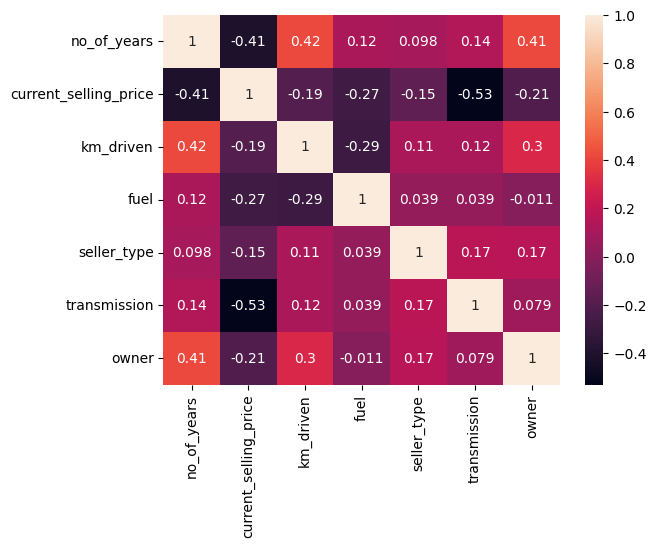

In [ ]:
sns.heatmap(df.corr(),annot=True)

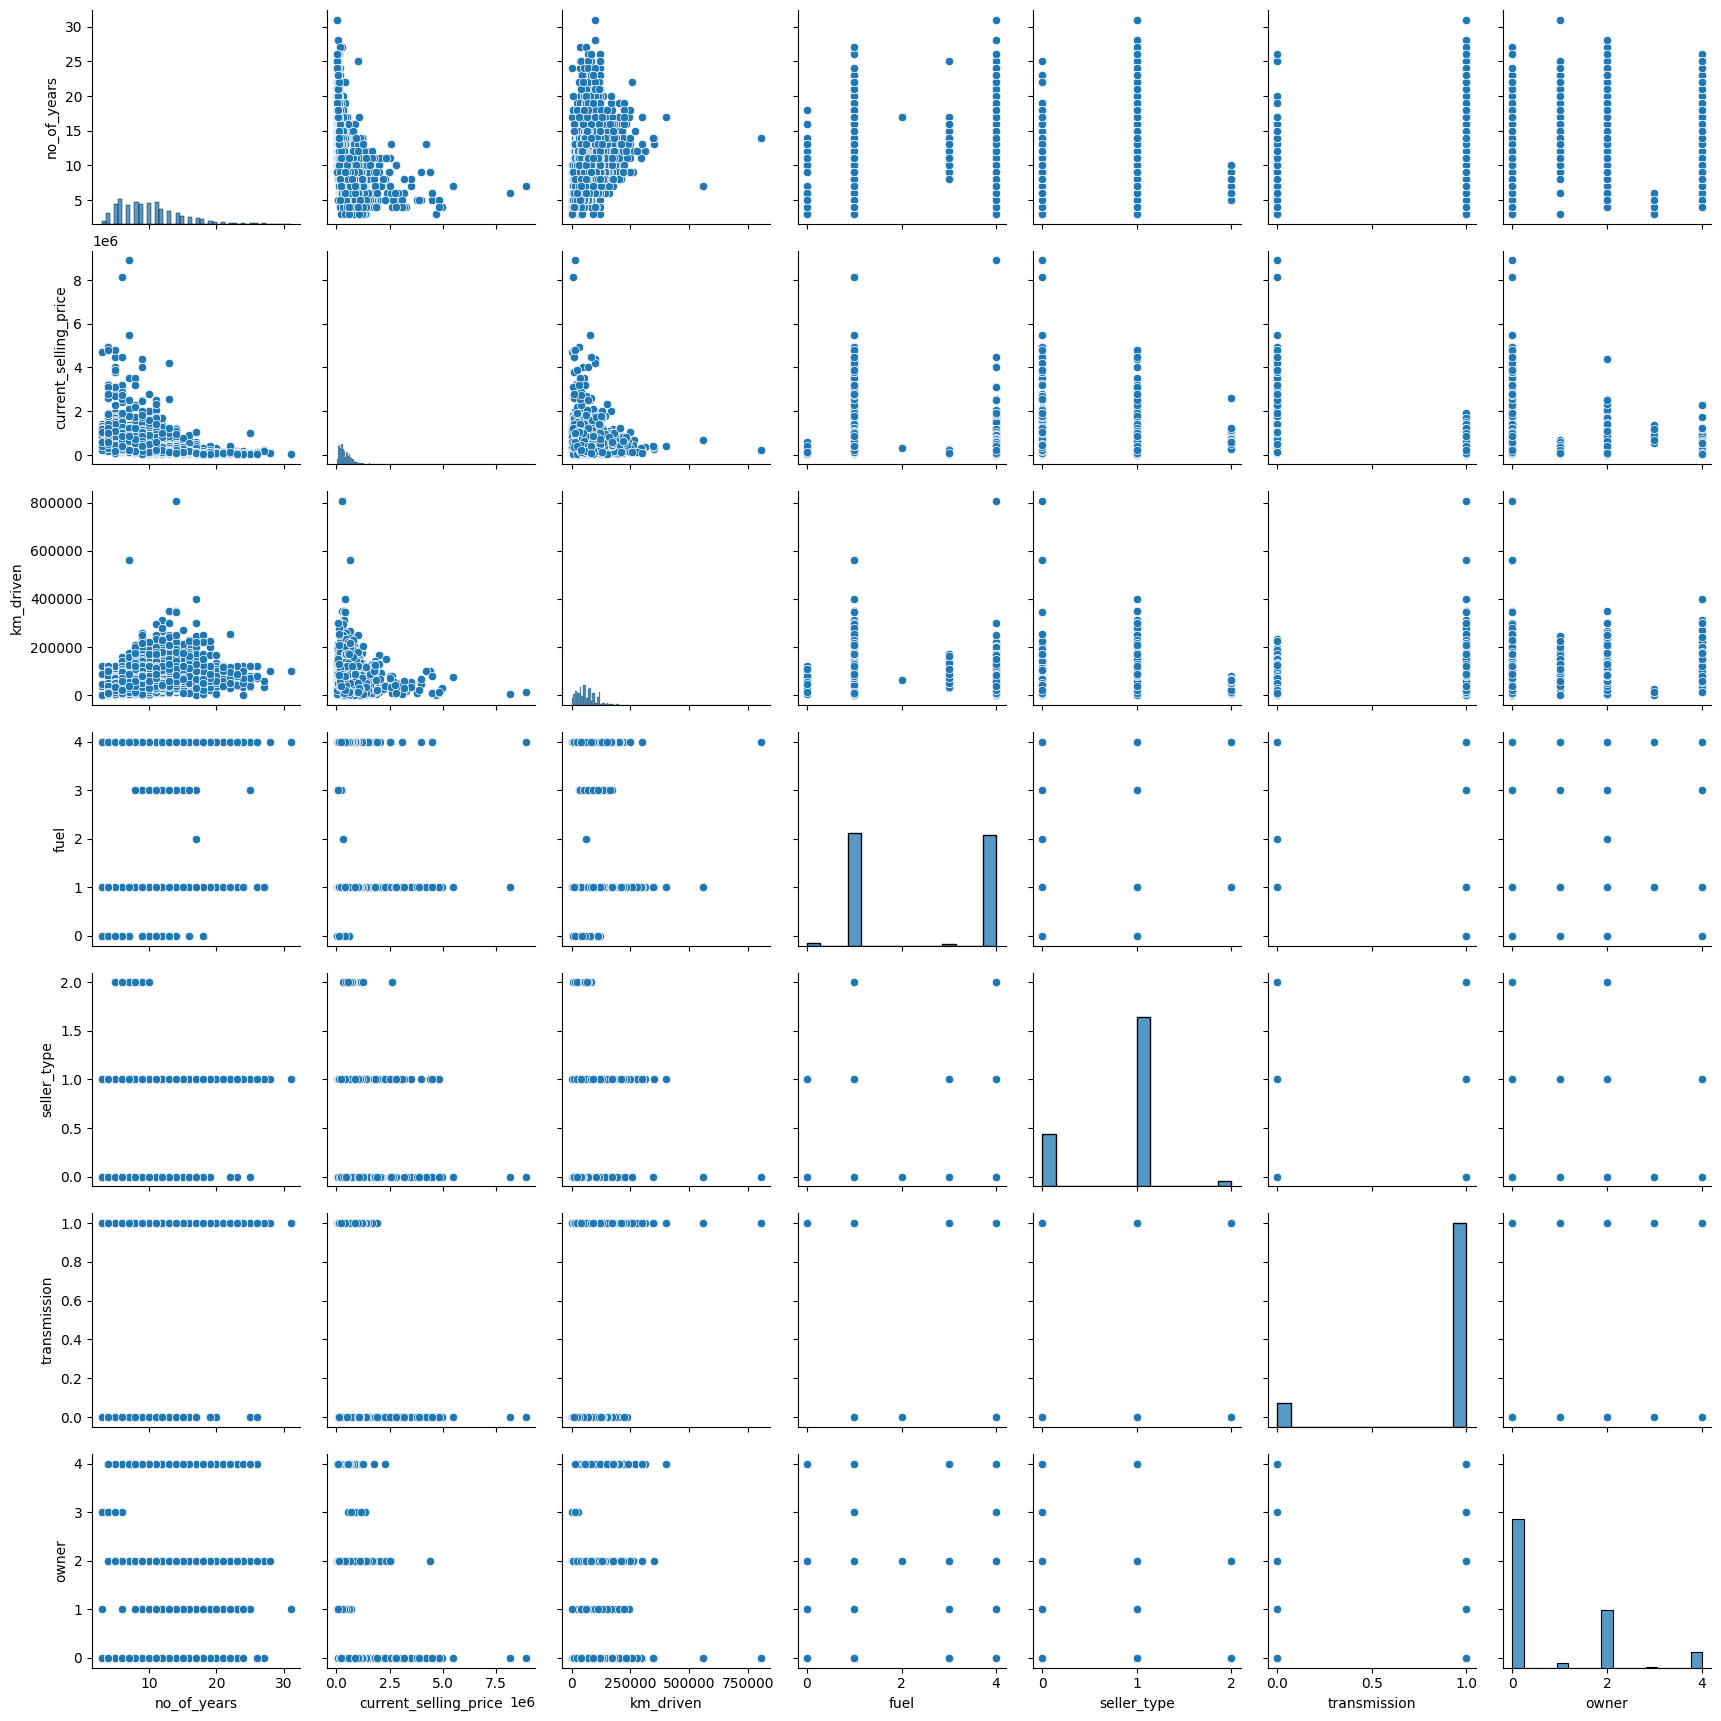

In [ ]:
sns.pairplot(df)

<Axes: >

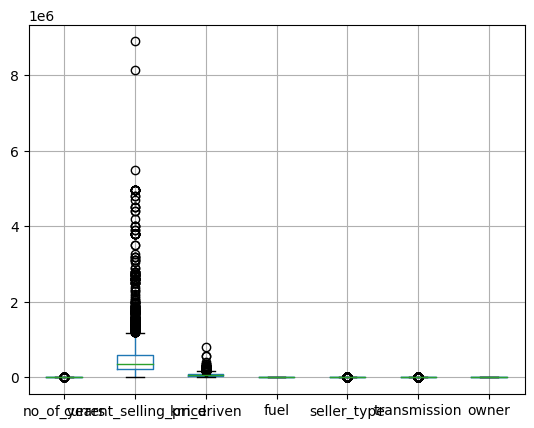

In [ ]:
df.boxplot()

In [ ]:
df.head(1)

,no_of_years,current_selling_price,km_driven,fuel,seller_type,transmission,owner
0,16,60000,70000,4,1,1,0


In [ ]:
x=np.array(df.drop('current_selling_price',axis=1))
y=np.array(df.current_selling_price)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [ ]:
len(xtest)

868

In [ ]:
regressor=DecisionTreeRegressor()

In [ ]:
regressor.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [ ]:
ypred=regressor.predict(xtest)

In [ ]:
ypred

array([ 374500.        ,  140000.        ,  110000.        ,
        140000.        ,  249666.66666667,  753333.33333333,
        456250.        ,  715000.        ,  550000.        ,
        760000.        ,  418333.33333333,  550000.        ,
        200000.        ,  530000.        ,  850000.        ,
        409999.        ,  501499.66666667,  400000.        ,
        170000.        ,  416666.66666667,  575000.        ,
        175000.        ,  580000.        ,   95000.        ,
        450000.        ,  360000.        ,  600000.        ,
        325000.        ,   55000.        ,  115000.        ,
       1750000.        ,  238333.33333333,  760000.        ,
        458333.33333333,   95000.        ,   92800.        ,
        180000.        ,  165000.        ,  120000.        ,
        217500.        ,  315000.        ,   65000.        ,
        315000.        ,  457500.        ,  125000.        ,
       1000000.        ,  295000.        ,  102500.        ,
         90000.        ,

In [ ]:
target=pd.DataFrame({'actual':ytest,'predicted':ypred})

In [ ]:
target.head()

,actual,predicted
0,600000,374500.000000
1,170000,140000.000000
2,300000,110000.000000
3,150000,140000.000000
4,239000,249666.666667


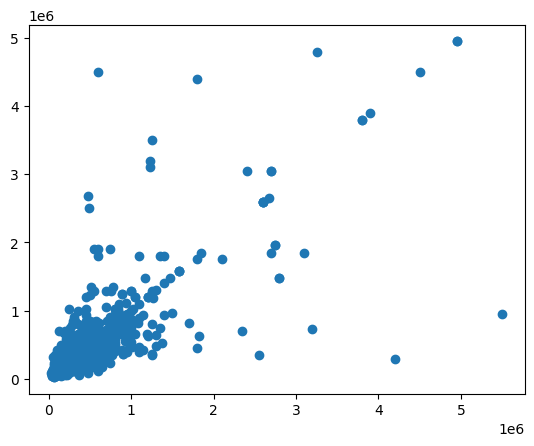

In [ ]:
plt.scatter(ytest,ypred)

In [ ]:
r2_score(ytest,ypred)

0.5248354210815327